# Zadanie 1
Zbiór: London_merged
Zbiór danych dotyczy bike-sharingu w Londynie.

    a) Przeprowadź regresję liniową, w której zmienną zależną jest kolumna cnt (wyłącz z analiz pierwszą kolumnę).
    b) Z kolumny time stamp stwórz kolumnę hour oraz year
    c) Wskaż, które parametry regresji są istotne na poziomie istotności 0,05
    d) Przedstaw korelacje między wszystkimi zmiennymi za pomocą heatmapy.
    e) Podziel dane ze względu na rok, przeprowadź dla każdego z lat osobną analizę regresyjną.

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr as r_coef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

df = pd.read_csv('datasets/london_merged.csv', parse_dates=['timestamp'])
print('Kolumna "timestamp" jest typu: ', df.timestamp.dtype)
df.head()

Kolumna "timestamp" jest typu:  datetime64[ns]


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [34]:
df['hour'] = df.timestamp.dt.hour
df['year'] = df.timestamp.dt.year
df = df.drop('timestamp', axis=1)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,year
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,2015
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,2015
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,2015
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,2015
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,2015


In [31]:
X = df.drop(['cnt'], axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared value: ', lr.score(X_test, y_test))

Mean Absolute Error: 679.761993963277
Mean Squared Error: 845645.4511940288
Root Mean Squared Error: 919.5898276916882
R squared value:  0.280633802540021


In [36]:
pd.DataFrame({'Test Dataset': y_test, 'Predictions': y_pred}).head(10)

,Test Dataset,Predictions
2631,489,1101.048546
16437,2105,793.139648
4886,108,798.149665
846,93,328.413622
3406,625,939.766537
653,62,-72.898238
12304,1330,1092.016353
415,3655,384.381451
15223,1637,1694.995165
10867,2563,1699.596275


In [38]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params
p = results.pvalues
print('Parametry regresji istotne na poziomie 0.05:')
print(p[p<=0.05])

Parametry regresji istotne na poziomie 0.05:
const            6.059868e-09
t1               2.928938e-12
t2               2.999246e-02
hum             2.895452e-274
wind_speed       1.230064e-05
weather_code     3.831971e-05
is_holiday       3.061053e-10
is_weekend       6.276341e-45
season           5.816572e-09
hour            3.490030e-186
year             3.956192e-09
dtype: float64


<AxesSubplot:title={'center':'Korelacje pomiędzy wszystkimi zmiennymi'}>

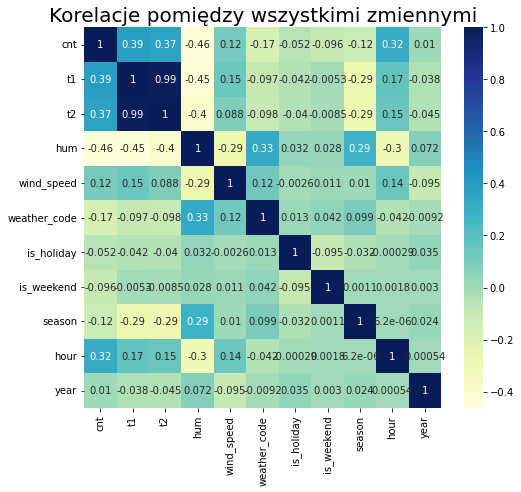

In [39]:
plt.figure(figsize=(8, 7))
plt.title('Korelacje pomiędzy wszystkimi zmiennymi', fontsize = 20)
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [40]:
years = []
for year in df.year.unique():
    years.append(df[df.year == year])

years[0].head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,year
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,2015
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,2015
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,2015
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,2015
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,2015


In [51]:
for year in years:
    X = year.drop(['cnt'], axis=1)
    y = year['cnt']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    
    print('Results for a year: ', year['year'].iloc[0])
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R squared value: ', lr.score(X_test, y_test))
    print()


Results for a year:  2015
Mean Absolute Error: 644.8854348717638
Mean Squared Error: 786145.1738987603
Root Mean Squared Error: 886.6482808299808
R squared value:  0.3292046754536818

Results for a year:  2016
Mean Absolute Error: 673.6427247600293
Mean Squared Error: 847987.0299797275
Root Mean Squared Error: 920.8621123597861
R squared value:  0.31306522852231

Results for a year:  2017
Mean Absolute Error: 449.8401928609406
Mean Squared Error: 570531.9489572508
Root Mean Squared Error: 755.3356531749648
R squared value:  -0.17123206663794188

